In [193]:
import pandas as pd
import matplotlib.pyplot as plt

In [194]:
df = pd.read_csv('sales_data.csv')
df = df.dropna()
print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156   8/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156   8/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688   12/6/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608   12/1/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608   12/1/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608   12/1/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608   12/1/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

# Finding top 10 most selling product

In [195]:
# total product with unique id in the dataset
len(df['Product ID'].unique())

1860

In [196]:
# finding top 10 most ordered products
n = 10
top_sales = df['Product ID'].value_counts()[:n].index.tolist()
top_sales_df = pd.DataFrame(top_sales, columns = ['product_id'])
print(top_sales_df)

        product_id
0  OFF-PA-10001970
1  TEC-AC-10003832
2  FUR-FU-10004270
3  TEC-AC-10002049
4  TEC-AC-10003628
5  FUR-CH-10002647
6  FUR-CH-10002880
7  FUR-FU-10001473
8  FUR-CH-10001146
9  FUR-CH-10003774


In [199]:
# calculating the sum of sales amount by product_id
for i in top_sales_df['product_id']:
    top_sales_df.loc[top_sales_df.product_id == i, 'total_sales']= df['Sales'][df['Product ID'].str.contains(i)].sum()

In [200]:
top_sales_df

,product_id,total_sales
0,OFF-PA-10001970,2155.068
1,TEC-AC-10003832,11203.756
2,FUR-FU-10004270,426.560
3,TEC-AC-10002049,13756.536
4,TEC-AC-10003628,1409.530
5,FUR-CH-10002647,3641.274
6,FUR-CH-10002880,5436.158
7,FUR-FU-10001473,839.676
8,FUR-CH-10001146,2247.176
9,FUR-CH-10003774,4166.884


Text(0, 0.5, 'Sales amount')

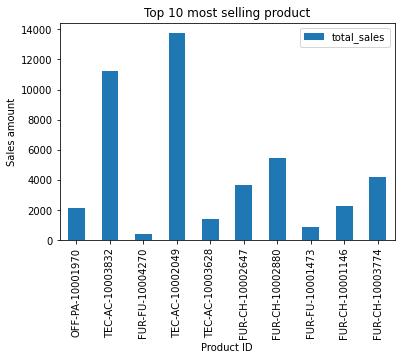

In [202]:
# drawing a plot "product vs sales amount"
ax = top_sales_df.plot.bar(title='Top 10 most selling product')
ax.set_xticklabels(top_sales_df['product_id'])
ax.set_xlabel("Product ID")
ax.set_ylabel("Sales amount")

# Finding total sales amount yearly

In [208]:
# convert order date to pandas datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
# inserting a year column in the dataframe by taking only year value from order date 
df['Year'] = pd.DatetimeIndex(df['Order Date']).year
# finding unique years 
sales_by_year = df['Year'].drop_duplicates().tolist()
sales_by_year_df = pd.DataFrame(sales_by_year, columns = ['year'])
print(sales_by_year_df)

   year
0  2017
1  2016
2  2015
3  2018


In [210]:
# calculating sum of sales yearly
for i in sales_by_year_df['year']:
    sales_by_year_df.loc[sales_by_year_df.year == i, 'total_sales']= df['Sales'][df['Year'].astype(str).str.contains(str(i))].sum()

In [211]:
# sort rows yearly
sales_by_year_df.sort_values(by = 'year', inplace = True)
print(sales_by_year_df)

   year  total_sales
2  2015  479856.2081
1  2016  454315.9054
0  2017  597225.4900
3  2018  721209.8092


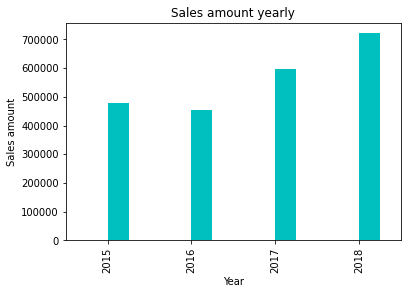

In [212]:
# drawing a plot "year vs sales amount"
ax = sales_by_year_df.plot.bar(title='Sales amount yearly', color = 'c')
ax.set_xticklabels(sales_by_year_df['year'])
ax.set_xlabel("Year")
ax.set_ylabel("Sales amount")
ax.get_legend().remove()

# Finding total sales amount by state

In [213]:
# selecting unique state values
sales_by_state = df['State'].unique().tolist()
sales_by_state_df = pd.DataFrame(sales_by_state, columns = ['state'])
print(sales_by_state_df)

                   state
0               Kentucky
1             California
2                Florida
3         North Carolina
4             Washington
5                  Texas
6              Wisconsin
7                   Utah
8               Nebraska
9           Pennsylvania
10              Illinois
11             Minnesota
12              Michigan
13              Delaware
14               Indiana
15              New York
16               Arizona
17              Virginia
18             Tennessee
19               Alabama
20        South Carolina
21                Oregon
22              Colorado
23                  Iowa
24                  Ohio
25              Missouri
26              Oklahoma
27            New Mexico
28             Louisiana
29           Connecticut
30            New Jersey
31         Massachusetts
32               Georgia
33                Nevada
34          Rhode Island
35           Mississippi
36              Arkansas
37               Montana
38         New Hampshire


In [215]:
# calculating sum of sales by state
for i in sales_by_state_df['state']:
    sales_by_state_df.loc[sales_by_state_df.state == i, 'total_sales']= df['Sales'][df['State'].str.contains(i)].sum()

In [216]:
# sorting dataframe by sales amount
sales_by_state_df.sort_values(by = 'total_sales', ascending=False, inplace = True)
# selecting top 15 most selling by state
sales_by_state_df = sales_by_state_df.head(15)

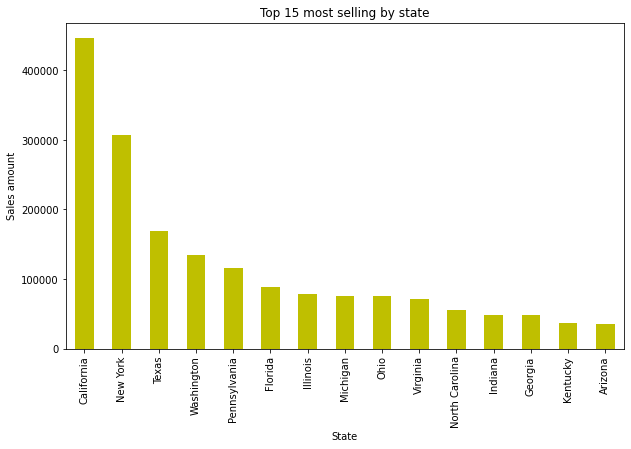

In [217]:
# drawing a plot "state vs sales amount"
ax = sales_by_state_df.plot.bar(title='Top 15 most selling by state', color = 'y', figsize=(10, 6))
ax.set_xticklabels(sales_by_state_df['state'])
ax.set_xlabel("State")
ax.set_ylabel("Sales amount")
ax.get_legend().remove()